In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
import os
from cv2 import cv2

from spline_fit import *

In [23]:
FILENAME = 'Control-EGCaMP_exp1_a1_30x10fps'

In [2]:
maxcurvs, meancurvs = fit("./results/" + FILENAME + "/midpoints/midpoints_bisection_corrected.csv", display=False)

100%|█████████████████████████████████████████████████████████████████████████████| 7489/7489 [01:04<00:00, 115.65it/s]


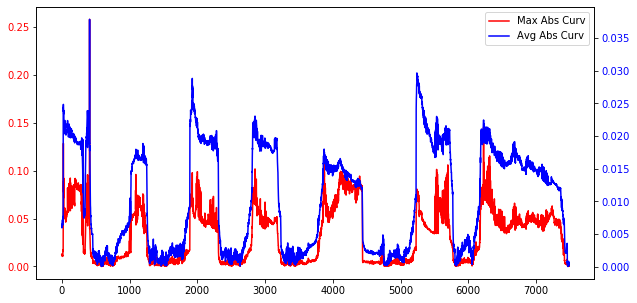

In [19]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ln1 = ax1.plot(maxcurvs, 'r', label='Max Abs Curv')
ax1.tick_params(axis='y', labelcolor='r')
ax2 = ax1.twinx()
ln2 = ax2.plot(meancurvs, 'b', label='Avg Abs Curv')
ax2.tick_params(axis='y', labelcolor='b')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.savefig('./results/' + FILENAME + '/splines/curvatures.jpg')
plt.show()

In [32]:
def save_video(outname):
    "Count the number of frames"

    # Directory name
    DIR = './results/'+ outname +'/frames/'

    # Number of frames
    nframes = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

    # Frame size
    frame_size = cv2.imread(DIR + 'img0.jpg').shape
    nx, ny = frame_size[0], frame_size[1]

    # Convert the frames into video
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    videoWriter = cv2.VideoWriter('./results/' + outname + '/splines/movie.avi', fourcc, 250, (ny, nx))

    for iframe in tqdm(range(nframes)):
        frame = cv2.imread(DIR + 'img' + str(iframe) + '.jpg')
        frame = cv2.resize(frame, (ny, nx))
        videoWriter.write(frame)
    videoWriter.release()
    cv2.destroyAllWindows()

In [33]:
save_video(FILENAME)

100%|██████████████████████████████████████████████████████████████████████████████| 7489/7489 [02:42<00:00, 46.07it/s]
